# Module 4: Machine-learning on breast-cancer cell imaging

### Learning objectives
This notebook is designed to give users an introduction to:
-  Exploratory data analysis of cell imaging features
-  Data pre-processing and normalization
-  Manifold-learning methods for clustering
-  Machine-learning classifiers in Scikit-learn
 
Users will after this notebook be able to:
-  Analyse and interpret machine-learning datasets
-  Perform dimensionality reduction for visualization and interpretation
-  Clean and transform datasets for machine learning
-  Build training and validation sets
-  Train Sci-kit learn machine learning classifiers
-  Perform hyperparameter optimization
-  Validate classifiers using appropriate performance metrics

### What is a feature?

In the context of machine-learning, a feature is some measurable property or observation which describes a sample. Usually one sample would correspond to a single row in a dataframe, and all features for that sample are described along the columns. Machine-learning algorithms rely on pattern recognition or identification of statistical relationships between the features that describe a sample, and the corresponding target label or target numerical value that matches with the sample.

For example, the sample may be blood serum taken from malaria infected or non-infected mice, the features levels of specific proteins in the serum, and the target label whether that mouse has a malaria diagnosis or not. The machine-learning classifier would in this case try to identify which features and in which combination best predict malaria status, within the dataset.


**Due to this, it is crucial that the features are as descriptive as possible of the sample target label or value.**

When building machine-learning models, the quality of the input features in the dataset that go into the model, is in practice far more important than the machine-learning model itself. For this we argue three reasons:
1. If there is poor or no relationship between the sample features and the target value, no machine-learning model will be able to predict an outcome. This is often summarized in computer-science and statistics as **"Garbage in, garbage out"** - https://en.wikipedia.org/wiki/Garbage_in,_garbage_out
2. Swapping out choice of a machine-learning architecture in your pipeline is usually relatively easy and quick, while collection, pre-processing and annotation of training datasets is usually hard and time-consuming
3. A good dataset will often be predicted well even by relatively simple machine-learning models. This particularly holds well for tabular data - data which can be represented as dataframes of rows and columns.

## Case study:

### Machine learning classification of imaging features from breast cancer fine-needle aspirates

Breast cancer is a state of malignant growth in the breast tissue.
If the condition is left untreated, it is likely that it will spread to other tissues, causing metastasis and cancer in other parts of the body. This eventually leads to death. 

According to the WHO World Cancer report 2020 [1], breast cancer is the most or second most type of cancer in the world, representing about 11.6 % of all new cancer diagnoses and had an estimated 2.1 million new cases in 2018. It is 100 times more common in women than in men. Luckily its 5-year age-adjusted net surival is relatively high at up to 90 % depending on geographical region, but this rate will be heavily dependent on how early the tumor can be detected and diagnosed.

Therefore, fast diagnosis is essential in minimizing patient morbidity and mortality. 
Current methods for diagnosis involves imaging based systems, invasive surgical procedures and histologistical evaluation. 

On the basis of this, W. Nick Street et. al. [2] proposed in 1992  a minimally invasive procedure, involving fine needle aspirates (FNA) from patients and assessing features of the extracted cell nuclei.  The extracted features were here used for classification or beneign or malignant status of the tumor, with good success. 

1. Reference: WHO World Cancer report 2020, 978-92-832-0448-0, https://publications.iarc.fr/586
2. Reference: Nick Street et al, 1992, Nuclear Feature Extraction For Breast Tumor Diagnosis. DOI: https://doi.org/10.1117/12.148698


<center><b>Nuclei imaging and estimation of perimeters</b></center>
<a href="img/nuclei.png"><center> <img src="img/nuclei.png" alt="Drawing" style="width: 600px;"/> <center/><a/>

    Figure 1, adapted from Nick street et al, 1992

The authors calculated 10 imaging features for each cell nuclei extracted from the fine needle aspirated, describing its shape and size. Over 569 samples or images were chosen for analysis.

The chosen features were:
1. Radius (mean of distances from nuclei center to points on the perimeter)
2. Texture (standard deviation of pixel gray-scale values)
3. Perimeter (distance between between snake points on the parimeter - circumference)
4. Area (by counting pixels)
5. Smoothness (local variation in radius lengths)
6. Compactness ($\frac{perimeter^2}{ area - 1.0}$)
7. Concavity (severity of concave portions of the contour outline)
8. Concave points (number of concave portions of the contour outline)
9. Symmetry of nucleus
10. Fractal dimension ($coastline\_approximation - 1$)

All features are reported with:
1. mean of all nuclei in sample
2. standard error
3. "worst" sample (calculated mean of the three worst nuclei in an image)

This gives a total of 30 features per sample that can be used for machine learning classification. 

For an illustration of how some of these features were calculated, the authors made these figures:

<center><b>Nuclei smoothness</b></center>
<a href="img/smooth.png"><center> <img src="img/smooth.png" alt="Drawing" style="width: 400px;"/> <center/><a/>
    
<center><b>Nuclei concavity</b></center>
<a href="img/concavity.png"><center> <img src="img/concavity.png" alt="Drawing" style="width: 340px;"/> <center/><a/>
    
<center><b>Nuclei symetry</b></center>
<a href="img/symetry.png"><center> <img src="img/symetry.png" alt="Drawing" style="width: 400px;"/> <center/><a/>
    
<center><b>Nuclei fractal dimension</b></center>
<a href="img/fractal.png"><center> <img src="img/fractal.png" alt="Drawing" style="width: 500px;"/> <center/><a/>

Figures from Nick street et al, 1992

Using a combination of these 30 variables for 569 patient fine-needle aspirate samples and a known diagnoses of the tumors, the authors were able to achieve a prediction classifier with 97.3 % accuracy (when assessed directly on the training set).

In this module we will be comparing three different machine learning classifiers from the scikit-learn library, to gain an understanding of the strength and weaknesses of each. We will analyze the relative contribution of all of the features in the prediction model and try to build the best classifier possible. Performance will be evaluated on a held out validation set, and finally tested on a hidden test only accessible at the end of the module.

### Scikit-Learn

<center><b>https://scikit-learn.org/stable/</b></center>
<a href="img/sklearn.png"><center> <img src="img/sklearn.png" alt="Drawing" style="width: 600px;"/> <center/><a/>
    
    

Scikit-Learn is a very popular machine-learning and data modelling library in Python, originally developed at a Google summer of code project in 2007. It is known to be used in the pipelines of many larger and well-known companies, including Spotify, OKcupid, and JP Morgan (https://scikit-learn.org/stable/testimonials/testimonials.html ).

The Scikit-learn library is designed around common tasks necessary to build machine-learning models, including dataset preprocessing, modelling of data, and choice of many different machine-learning architectures for classification, regression, clustering and more. In particular it is built on top of, among other libraries, Numpy, SciPy, Pandas and Matplotlib, making their integration easy. It is possible to load a sample dataset, train a machine-learning model and estimate its performance in very few lines of code, as demonstrated in this quick tutorial from machinelearningmastery.com:

https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/

We encourage you to read more on Scikit-learn and the many functions it supports in the User Guide, after or during this module: https://scikit-learn.org/stable/user_guide.html

In this module we will be focusing on the use of Sklearn "fit-transformers" for dataset normalization, dataset visualization through manifold learning, and use three different machine-learning models that we will compare the performances of on the same data. In particular, we want to highlight how the different decisions we make impact the final results, and which considerations are important when building a robust prediction model.

## Imports

In [14]:
# Data science libraries
import pandas as pd
import numpy as np

# Plotting libraries
from matplotlib import *
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, "scripts/")
import competition_model
submit_competition_model = competition_model.competition_model_class()

# This is a custom script which gives intended coloring to cells in this notebook
from scripts.noteStyle import set_styles, background
set_styles()

In [15]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
#Show matplotlib graphs directly in jupyter notebook
# Allow reloading of scripts
# Automatically reload scripts if they change

# Part 1: Dataset overview and explorative data analysis

The dataset we will be using was downloaded in an already pre-processed and machine-learning ready format from Kaggle at:
https://www.kaggle.com/mercheovejero/breast-cancer-analysis-real-machine-learning

This enables us to quickly get started on analysing the dataset and make our additional pre-processing and normalization steps relatively straight forward.

The original dataset can also be downloaded from the University of California, Irvey machine learning datasets repository here: 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


Throughout this section we will explore the dataset layout and individual features. 
Specifically we want to explore relationships in the dataset features and remove any unwanted or non-predictive features. We also want to calculate the sampling frequencies of both groups of the dataset. 
Lastly, we want to explore the dymanic ranges of feature levels in the dataset.

## Dataset loading

We will now focus on the following tasks: loading the dataset into a data frame, inspect the type and values we have loaded, and clean it up to remove unuseful data or formatting errors. 
<b>Even though this step might seem trivial, it is a major source of errors for beginners!</b>

The dataset as a csv file can be loaded using the Pandas <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"> .read_csv()</a> method.

In [16]:
df_raw = pd.read_csv("data/breast-cancer-wisconsin-data.csv")
df_raw

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


We can inspect the datatypes contained in each feature column using the DataFrame <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html"> .dtypes()</a> method.





In [17]:
df_raw.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

We can see that most features are of the type float64, which are numerical features. The id column values are of type int64, as the id's are integers. Diagnosis is of dtype object as they are  strings.

We note that each sample has been marked with an ID number, identifying the sample/patient it came from. The diagnosis field represents the Malignant (M) or Benign (B) status of the breast tumor cell nuclei. 

The ID field is not useful to us for data analysis or machine-learning predictions, and there is an additional "Unnamed: 32" column with no information. We will remove these columns. In addition, we will define the "Diagnosis" column as a categorical type. This means that each unique value in "Diagnosis" will be interpreted as separate categories, as opposed to numbers along a continous scale.

Note: This is technically not necessary when the values are specified as strings ("M", "B"). However if the values were 0.0 and 1.0, and we did not specify that these were categorical labels, they would be interpreted on a continuous scale and e.g 1 would be considered one unit higher than 0, and 0.5 as being an intermediate value exactly in between them.

In [18]:
# Remove/drop a column we are not interested in. This column will now no longer be a part of the dataframe.
df_proc = df_raw.drop(["id", "Unnamed: 32"], axis = 1)

# Set the diagnosis labels as categorical (not continous) labels
df_proc["diagnosis"] = df_proc["diagnosis"].astype("category")

In [19]:
df_proc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From the dataset description generated by pandas .describe method, we observe that the features are on very different scales and dynamic ranges. For example, "area_mean" has a mean value of 654.889104 and a standard deviation of 351.914129, while the feature "compactness_mean" has a mean of 0.104341 and a standard deviation of 0.052813. These are vastly different scales.

Without correcting for this bias, "area_mean" will likely contribute more to the final prediction than "compactness_mean" just because the magnitude of change in "area_mean" is bigger. We will come back to this problem later. 

#### Types of each diagnosis
We want to make sure that we have sampled enough patients from both group (B and M) to make good predictions... We therefore want to count the number of samples in both groups. For this we can use the Pandas Series [.value_counts()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method.


In [20]:
# Note that accessing a single column of the DataFrame df_proc does not return a dataframe. It returns a Pandas Series (of values)
df_proc["diagnosis"].value_counts()

# If you wanted to confirm this, you could run:
# type(df_proc["diagnosis"])

B    357
M    212
Name: diagnosis, dtype: int64

To put these numbers into perspective, we can plot them using a barplot.

/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of benign and malignant samples in dataset')

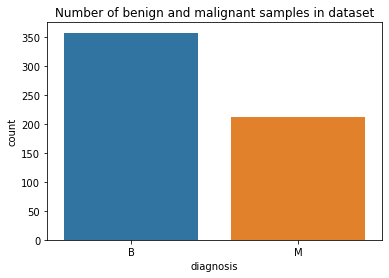

In [21]:
data = df_proc["diagnosis"]
sns.countplot(data, label="Count", order = ['B', 'M']) 
plt.title("Number of benign and malignant samples in dataset")

<div class = 'yellow'>

Accessing a single column of a DataFrame returns a Pandas Series with all the values and index label for that column. While a DataFrame can have multiple columns, a Series technically has no columns, it is only a series of values with an associated index. This is important to note as some methods (such as **.value_counts()** ) only work on Series, or on DataFrames or Numpy arrays. 

Return Pandas DataFrame (Can access any number of columns and/or rows at a time):
- **df_raw[["diagnosis"]]**
- **df_raw[["diagnosis", "area_mean"]]**

Return Pandas Series (Can only access one column at a time): 
- **df_raw["diagnosis"]**

You can convert a DataFrame or a Pandas Series into a numpy array (only values, no named index) by using:
- np.array(df_raw)
- df_raw.values

# Part 2: Preprocessing

## Dataset preprocessing and normalization

Machine-learning relies on identifying statistical relationships in numerical data. This means that we must ensure all features in our dataset are in a numerical format, as well as normalize the data such that it is easier for the machine-learning models we will use to work with.

Data normalization is a critical part of biological data science. The goal of normalization is to push numerical data onto a common scale, without distorting the measurement distributions. 

This is done partially due to the risk of features with a larger total value or magnitude of change, being likely to contribute more to the final prediction, regardless of whether these features are more predictive or not. This is particularly an issue when training more complex models like neural networks, which are very sensitive to large differences in the scaling of features. Additionally, many machine-learning models are able to converge/train faster when all features are on the same scale, including LogisticRegression, SupportVectorMachines and neural networks. 



<center><b>sklearn.preprocessing.MinMaxScaler</b></center>
<a href="img/min_max_scaling.png"><center> <img src="img/min_max_scaling.png" alt="Drawing" style="width: 600px;"/> <center/><a/>
    
Source: [https://medium.com/hacktive-devs/feature-engineering-in-machine-learning-part-2-ab7fe457a85a](https://medium.com/hacktive-devs/feature-engineering-in-machine-learning-part-2-ab7fe457a85a)

One of the most common and simple normalization methods used in machine learning is [**min-max scaling**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), where all observations of a feature is scaled to a range interval, e.g. 0-1. Min-max scaling preserves the original distribution of our features, but puts them all on a common scale. This also means that the effect of outliers will be preserved, which can either be intended and beneficial, or severely shift the distribution in an unintended way. With this caveat in mind, Min-Max scaling is usually a robust choice and often the first choice of normalization method to try without having special considerations for the data.

The rationale for our normalization strategy is as follow: 

We do not care about the absolute value of a feature or the absolute value of difference. This is because mesurements come in all sorts of unit, e.g. meters and millimeters. If not scaling to a common range, then a feature would count more to the prediction if it was reported in millimeters than in meters. 

Min-max scaling essentially squeeze the data onto a specified range. Thereby the internal distribution is preserved. 

One significant downside of min-max scaling is that it is sensitive to outliers. 

Another approach for data scaling that is more robust to outliers is Sklearn´s [**StandardScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), which uses Z-score normalization. Here the data is scaled to mean = 0 and standardized to a standard deviation = 1. 

An example of an implementation of a z-score normalization from sklearn can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Read more on data normalization for machine learning:
https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029




#### Using MinMaxScaler

A nice trick we can use to find all the columns with numerical data, is to run the Pandas <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html'> .select_dtypes() <a/> method. 
    
This method will return only the data (and columns) with data of the specified types. As we found out earlier, all of the features we want to explore are of dtype = float64, so we could specify that. A more general solution would be to specify np.number, which would allow us to select columns with any type of numerical encoding.

In [22]:
df_proc.select_dtypes(include=[np.number])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


You can also show the inverse - all data which is NOT numerical:

In [23]:
df_proc.select_dtypes(exclude=[np.number])

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


Here we use this functionality to scale only numeric features. For data scaling we use the sklearn method MinMaxScaler. 

Lastly, we map the diagnosis to numeric labels instead of strings.

In [24]:
# Let´s load the data again ot make sure we are starting fresh
df_proc = df_raw.copy()

# And lets drop the columns we are not interested in
df_proc = df_proc.drop(["id", "Unnamed: 32"], axis = 1)
 
# Select the numerical columns ...
numerical_columns = df_proc.select_dtypes(include=[np.number]).columns
numerical_columns



Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Scikit-Learn normalization methods - known as transformers - are usually initialized with a .fit method. The initialized transformer then can transform any data with the same features (same number of columns) using the .transform method.

Since we want to both fit and transform the same data, we will do both steps at once using the .fit_transform method. The MinMaxScaler is first fitted to our data. It then transforms the features using the minimum and maximum values per feature it read during initialization. The fit_transform function performs both steps at once, but it is also possible to run them in this order separately. For example if you already fitted the MinMaxScaler on the dataset, but acquired more data you wanted ot use as an external test set, you could use the already fitted MinMaxScaler to normalize your new data in the same way as your current dataset.

In [25]:
# Lets scale the features using Scikit-Learn´s preprocessing.MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X = df_proc[numerical_columns].values
X_scaled = min_max_scaler.fit_transform(X)
X_scaled

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

X_scaled contains our normalized values, encoded as a numpy array. You can see this from the "array" part when printing the variable, but you can also check this by running type(X_scaled).

We will now replace the un-normalized values in our dataframe with our normalized values. In order to keep track of which values we are using, we will name this new dataframe something else:

In [26]:
df_proc_scaled = df_proc.copy()
df_proc_scaled[numerical_columns] = X_scaled
df_proc_scaled


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


There is one more thing we need to do. Notice how we have a single, non-numerical column? The diagnosis label is assigned as strings. If we did not recognize this manually, we could also identify this by checking which of the columns are NOT the numerical columns we found. 

In [27]:
df_proc_scaled.columns.isin(numerical_columns)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Note that we will use the ~ operator to invert the result above, to give us the NON-numerical columns

In [28]:
df_proc_scaled.columns[~df_proc_scaled.columns.isin(numerical_columns)]

Index(['diagnosis'], dtype='object')

Let´s convert these into numerical values. We can do this using the pd.DataFrame.map method. We will map "B" for benign to 0, and "M" for malignant to 1.

In [29]:
# Set diagnosis to 0 and 1 labels (numeric)
df_proc["diagnosis"] = df_raw["diagnosis"].map({"M":1, "B":0})
df_proc_scaled["diagnosis"] = df_raw["diagnosis"].map({"M":1, "B":0})

Let´s visualize our data before and after normalization to see how the process impacted our data for one feature:

/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Before MinMax scaling')

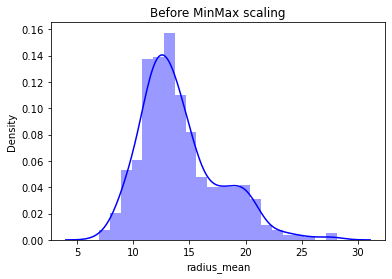

In [30]:
x = df_raw["radius_mean"]
sns.distplot(x, color = "blue")
plt.title("Before MinMax scaling")

/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'After MinMax scaling')

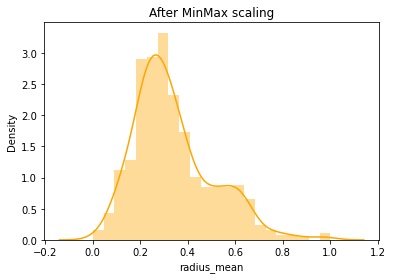

In [31]:
y = df_proc_scaled["radius_mean"]
sns.distplot(y, color = "orange")
plt.title("After MinMax scaling")

/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'After vs before MinMax scaling')

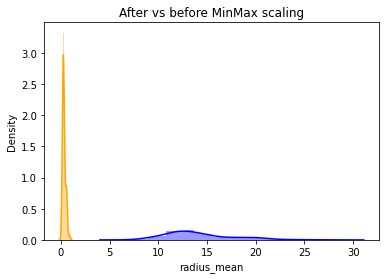

In [32]:
sns.distplot(x, color = "blue")
sns.distplot(y, color = "orange")
plt.title("After vs before MinMax scaling")

Perfect! Now all values in our dataframe are numerical, and all continous values (i.e. the numerical data which were not diagnosis labels) are normalized. We may now proceed with our analysis.

# Explorative data analysis

In this section we will explore feature distributions and correlations. This provides an idea of which features are likely to be good tumor status predictors, which features are co-correlated, and discover any issues the features may have in our dataset. 

Before we start looking into any specific distributions, we will use dimensionality reductions and manifold learning, to highlight how well the features jointly separate the benign and malignant samples. 

We will compare 2 different manifold learning methods for dimensionality reduction on our dataset.
These can be read in more detail on here: https://scikit-learn.org/stable/modules/manifold.html#manifold

__Principal component analysis (PCA):__
PCA is a linear dimensionality reduction which aims to convert observations with correlated variables into linearly uncorrelated variables (principal components). The first principal component is a linear combination of the original variable that describes the largest source of variation. The second component is another linear combination of the input variables, independent from (orthogonal to) the first, that describes most of the residual variation in the data - it is therefore the second highest variation component. In a similar way, each of the following principal components describe less and less of the variability, until the last component. Intuitively, only working with the largest sources of variation reduces the redundancy and noise in the data. It also becomes a lot easier to compute on.

In simple terms, PCA reduces the dimensionality of the data into linearly uncorrelated components. Components are ordered by increasing importance (how much of the data variation they explain). In some dataset, the first 2-4 components may describe a large fraction of the variance (e.g. 95%), and possibly be enough by themselves to separate groups of samples.
It is important to underline that the principal components are obtained as linear combination of the original variables - therefore, if non-linear dependency are present among variables, those will not be fully identified by PCA.
**Read more:** Intuition for Principal Component Analysis (PCA), https://blog.ephorie.de/intuition-for-principal-component-analysis-pca


__T-distributed Stochastic Neighbor Embedding (t-SNE):__
t-SNE is an unsuperviced non-linear dimensionality reduction used to embed high-dimensional data into 2 or 3 dimensions, in such a way that similar objects are put close together in the embedded space. This gives a good intuition for what objects belong to the same class. Therefore t-SNE is often used for visualization of high-dimensional data. 
This is achieved by modeling the data in low dimensional space t-SNE preserves small parwise distances. This yields a map where local structures are accurately captured, whilst the global structure may hold little to no meaning. 
**Read more:** https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

In [33]:
data_X, data_y = df_proc_scaled.drop("diagnosis", axis = 1), df_proc_scaled["diagnosis"]

,Component1,Component2,Component3,Component4,diagnosis
0,1.387021,0.426895,-0.541710,0.048481,1
1,0.462308,-0.556947,-0.205176,-0.042830,1
2,0.954621,-0.109701,-0.147849,-0.001067,1
3,1.000816,1.525089,-0.053269,-0.207915,1
4,0.626828,-0.302471,-0.409339,0.238810,1
...,...,...,...,...,...
564,1.002840,-0.474785,-0.100042,0.272995,1
565,0.620757,-0.517200,0.400363,0.182444,1
566,0.226311,-0.287946,0.315226,-0.011746,1
567,1.677834,0.335946,0.296114,-0.156305,1


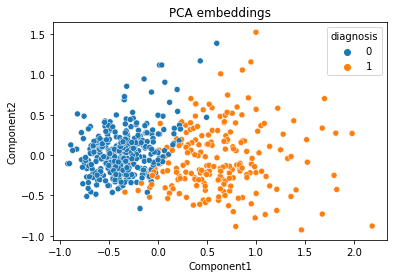

In [34]:
# Caclulate the embeddings
from sklearn.decomposition import PCA
model = PCA(n_components=4)
embeddings = model.fit_transform(data_X)

# Create the plotting dataframe
plot_df = pd.DataFrame(embeddings, columns = ["Component1","Component2", "Component3","Component4"])
plot_df["diagnosis"] = data_y

# Plot
sns.scatterplot(x = "Component1", y = "Component2", data = plot_df,
               hue = "diagnosis")
plt.title("PCA embeddings")

# Show values
plot_df

In [35]:
embeddings

array([[ 1.38702122e+00,  4.26895220e-01, -5.41709904e-01,
         4.84807796e-02],
       [ 4.62308252e-01, -5.56946760e-01, -2.05176151e-01,
        -4.28303772e-02],
       [ 9.54621472e-01, -1.09701157e-01, -1.47848938e-01,
        -1.06738459e-03],
       ...,
       [ 2.26311313e-01, -2.87945738e-01,  3.15225932e-01,
        -1.17461781e-02],
       [ 1.67783369e+00,  3.35945927e-01,  2.96114061e-01,
        -1.56305452e-01],
       [-9.05068038e-01, -1.04108903e-01,  3.82849036e-01,
         6.83572256e-02]])

,Component1,Component2,diagnosis
0,34.207458,17.896420,1
1,19.806538,9.387826,1
2,30.865993,13.831332,1
3,22.442743,1.541194,1
4,21.587406,16.012486,1
...,...,...,...
564,32.472515,10.770337,1
565,24.801754,12.309140,1
566,13.351972,4.536528,1
567,35.852921,16.007612,1


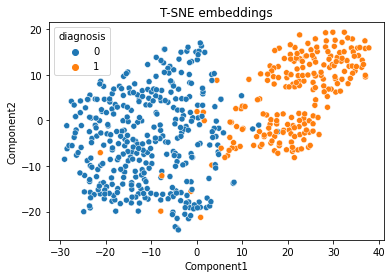

In [36]:
# Caclulate the embeddings
from sklearn import manifold
model = manifold.TSNE(n_components=2)
embeddings = model.fit_transform(data_X)

# Create the plotting dataframe
plot_df = pd.DataFrame(embeddings, columns = ["Component1", "Component2"])
plot_df["diagnosis"] = data_y

# Plot
sns.scatterplot(x = "Component1", y = "Component2", data = plot_df,
               hue = "diagnosis")
plt.title("T-SNE embeddings")

# Show values
plot_df

Task: Try to run the dimensionality reduction methods again. Do the results change? Can you figure out why?

You can find more dimensionality reduction / manifold learning methods to try here: **https://scikit-learn.org/stable/modules/manifold.html#manifold**

With both dimensionality reduction methods we see a clear separation by the cancer status. From this, we can infer that future machine learning models will also be able to capture spatial differences between nuclei from beneign and malignant samples.

To get a quick sense of what features may be predictive of the diagnosis, we make a pearson correlation using the pandas <a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html' >.corr() <a/> method.
    
We here infer that that features that correlate well with the group label, will be good predictors. 

We do though acknowledge that also features with poor correlation to the group label, may add value and therefore better the accuracy of the final model.

The Pandas DataFrame [.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) method is a powerful method to quickly compute pairwise Pearson (default), Spearman or Kendall tau correlations between all features (columns) in a dataframe. 
    
Pearson correlation calculates the linear relationship between two numerical vectors (in our case - dataset features). Spearman correlation on the other hand calculates the relationship between the ranks of the data, thus capturing non-linear relationships better. 
    
Read more about and see examples of Spearman and Pearson correlations:
https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/

In [37]:
df_proc_scaled.corr(method = "spearman")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.732785,0.461971,0.748496,0.734122,0.371892,0.609288,0.733308,0.777877,0.332567,...,0.787933,0.476720,0.796319,0.786902,0.425513,0.606810,0.705734,0.781674,0.396843,0.311477
radius_mean,0.732785,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,...,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564
texture_mean,0.461971,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,...,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144
perimeter_mean,0.748496,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,...,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961
area_mean,0.734122,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,...,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758
smoothness_mean,0.371892,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,...,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457
compactness_mean,0.609288,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,...,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986
concavity_mean,0.733308,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,...,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838
concave points_mean,0.777877,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,...,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110
symmetry_mean,0.332567,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,...,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069


Since we mostly care about which features correlate the most with the diagnosis label (benign or malignant tumor), we can extract the "diagnosis column" and sort the correlating features by the highest values.

In [38]:
correlations_ordered = df_proc_scaled.corr(method = "spearman")['diagnosis'].sort_values(ascending = False)
correlations_ordered

# Note that the sort_values method by default will return values in ascending order
# If you want the top values first, do .sort_values(ascending=False) or do correlations_ordered[::-1] to reverse the order

diagnosis                  1.000000
perimeter_worst            0.796319
radius_worst               0.787933
area_worst                 0.786902
concave points_worst       0.781674
concave points_mean        0.777877
perimeter_mean             0.748496
area_mean                  0.734122
concavity_mean             0.733308
radius_mean                0.732785
area_se                    0.714184
concavity_worst            0.705734
perimeter_se               0.630411
radius_se                  0.616912
compactness_mean           0.609288
compactness_worst          0.606810
concave points_se          0.488717
texture_worst              0.476720
concavity_se               0.470338
texture_mean               0.461971
smoothness_worst           0.425513
symmetry_worst             0.396843
compactness_se             0.380666
smoothness_mean            0.371892
symmetry_mean              0.332567
fractal_dimension_worst    0.311477
fractal_dimension_se       0.201492
texture_se                 0

/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

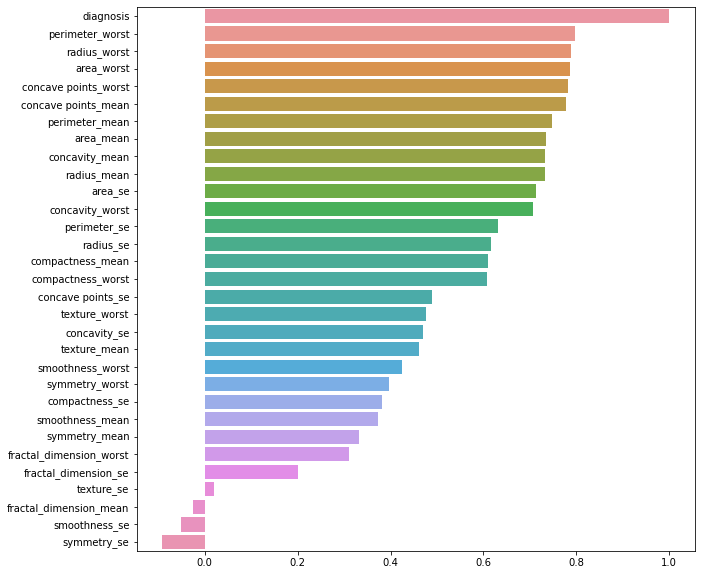

In [39]:
df_plot = correlations_ordered
plt.subplots(figsize = (10,10))
sns.barplot(df_plot.values, df_plot.index)

We here observe that concave "perimeter_worst", "radius_worst" and "concave area_worst" are the features that are the features most correlated to "diagnosis". The feature "diagnosis" of course perfectly correlates with itself, giving a Pearson r value of 1.0.

To find features that are highly co-correlated with each other and therefore unlikely to add more useful information (only providing redundant information) to the final model, we can inspect the features co-correlations using the Seaborn [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html) graphing function. 

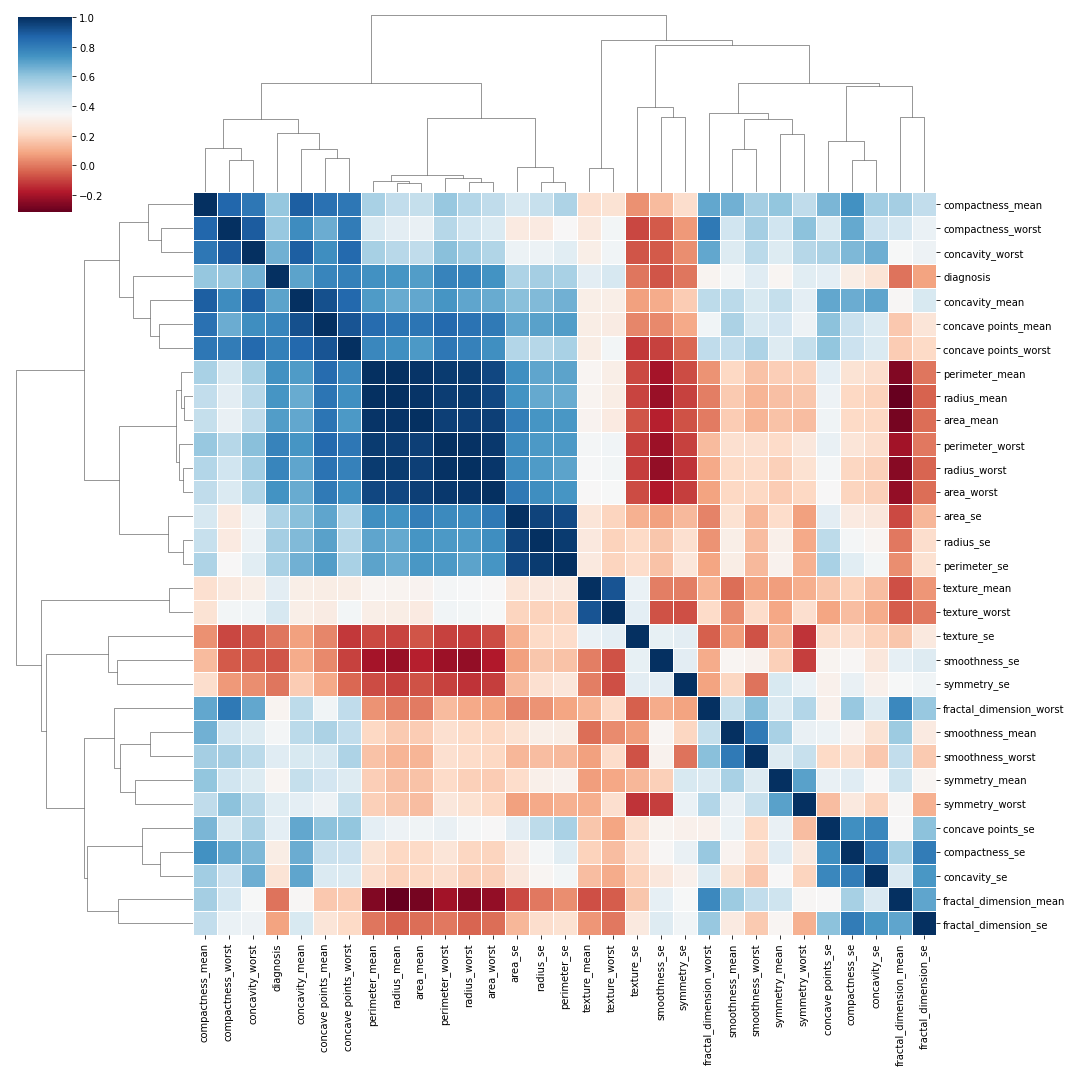

In [40]:
correlations = df_proc_scaled.corr()

sns.clustermap(correlations, method = "average", metric = "euclidean",
               figsize = (15, 15), linewidth=0.5, cmap = 'RdBu')

The colored blocks which cluster together are blocks of features that co-correlate highly. Each feature´s correlation with another is seen along the x and y axes. Note that because the correlation between a given feature1 and feature2 is the same as feature2 and feature1, the clustermap is symmetrical.

We observe that there is a high similarity between the perimeter/radius/area mean and worst values, which seem to mostly be reporting the same information. Including more than one of them in the model is therefore unlikely to increase performance. We see the same pattern for the area, radius and perimiter standard error features.

Can you identify sets of features which are highly correlated with "diagnosis", but also highly different from each other?

Now we have a map giving us which features are likely good predictiors of malignant tumors, and how co-correlated those features are. To visualize how well the selected features individually separate the two groups, we use a combination of violinplots and swarm plots. 

In [41]:
# Extract the top 10 features
top_features_only = df_proc_scaled[correlations_ordered.index[0:10]]

plot_df = pd.melt(top_features_only,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plot_df

,diagnosis,features,value
0,1,perimeter_worst,0.668310
1,1,perimeter_worst,0.539818
2,1,perimeter_worst,0.508442
3,1,perimeter_worst,0.241347
4,1,perimeter_worst,0.506948
...,...,...,...
5116,1,radius_mean,0.690000
5117,1,radius_mean,0.622320
5118,1,radius_mean,0.455251
5119,1,radius_mean,0.644564


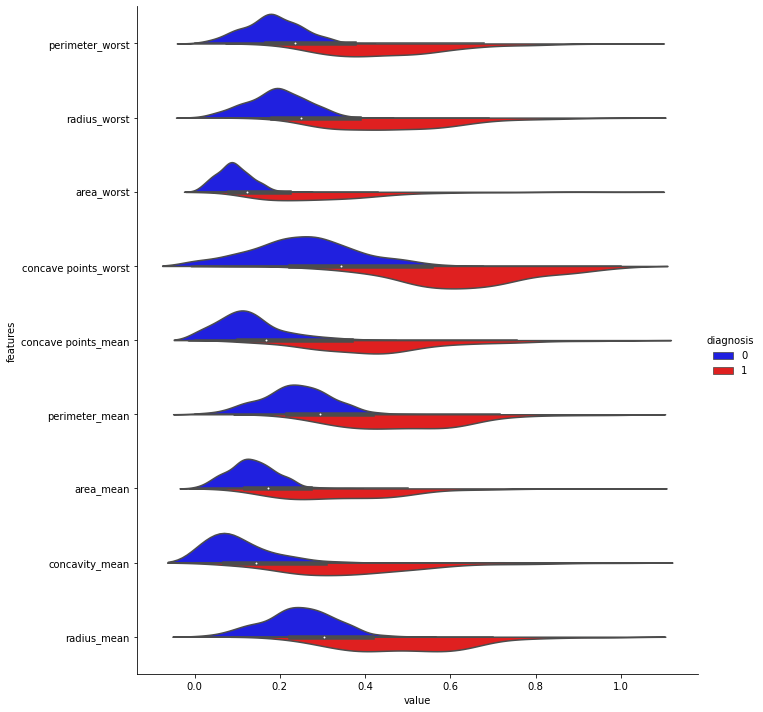

In [42]:
sns.catplot(data=plot_df, y="features", x="value", 
                   kind = "violin", split = True, # Split violin-plot with two graphs "in one"
                   hue="diagnosis", palette={0:'blue', 1:'red'}, # Set colors
                   height = 10, aspect = 1) # Determine figure size

We can also visualize the individual points and label the graph properly with a few added lines of code.

/Users/admin/opt/anaconda3/envs/biodatascience101/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Top 10 features by separation of benign from malignant tumors')

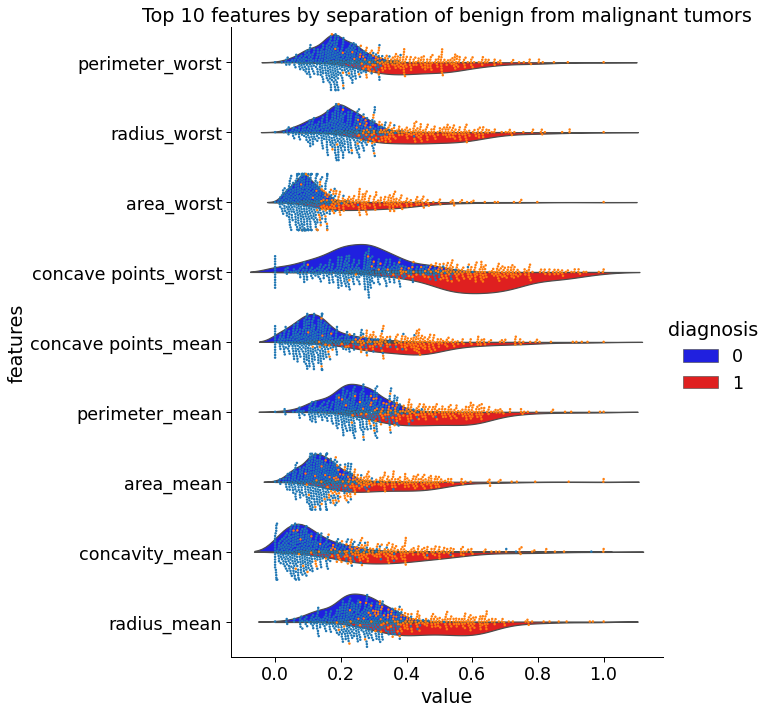

In [43]:
# Plot
sns.set_context(context = "paper", font_scale = 2)

#Violinplot with 2 distributions in one graph
fig1 = sns.catplot(data=plot_df, y="features", x="value", 
                   kind = "violin", split = True, # Split violin-plot with two graphs "in one"
                   hue="diagnosis", palette={0:'blue', 1:'red'}, # Set colors
                   height = 10, aspect = 1) # Determine figure size

# Swarmplot to see all plot_df points on top of the violinplot
fig2 = sns.swarmplot(data=plot_df, y="features", x="value", hue = "diagnosis", size=2.5) 

# Remove the extract second legend
fig2.get_legend().remove() 
plt.title("Top 10 features by separation of benign from malignant tumors")

Besides looking for features that are correlated to the phenotype, we can also test for associations between phenotype and feature distributions.
This we do using the non-parametric <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html'>Mann-Whitney U Test.

In [57]:
df_raw["diagnosis"].map({"B":0, "M":1})

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [67]:
from scipy.stats import mannwhitneyu
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

u_tests = pd.Series(dtype=float)
for col in df_proc_scaled.columns[1:]:
    b = df_raw[df_raw.diagnosis == 'B'][col]
    m = df_raw[df_raw.diagnosis == 'M'][col]
    u_value = mannwhitneyu(b,m)[1]
    u_tests.loc[col] = u_value
    
print("Mann-Whitney U test of features:")
u_tests.sort_values()

Mann-Whitney U test of features:


perimeter_worst            2.583004e-80
radius_worst               1.135630e-78
area_worst                 1.803309e-78
concave points_worst       1.863997e-77
concave points_mean        1.006324e-76
perimeter_mean             3.553870e-71
area_mean                  1.539780e-68
concavity_mean             2.164549e-68
radius_mean                2.692943e-68
area_se                    5.767823e-65
concavity_worst            1.761723e-63
perimeter_se               5.099437e-51
radius_se                  6.217140e-49
compactness_mean           8.951992e-48
compactness_worst          2.115525e-47
concave points_se          2.370852e-31
texture_worst              6.517718e-30
concavity_se               3.675508e-29
texture_mean               3.428627e-28
smoothness_worst           3.637942e-24
symmetry_worst             3.151237e-21
compactness_se             1.168061e-19
smoothness_mean            7.793007e-19
symmetry_mean              2.268050e-15
fractal_dimension_worst    1.144240e-13


We have now visualized the overall distribution of our dataset using manifold learning and its ability to distinguish tumor status,
identified co-correlating features which are unlikely to give us much additional information if including multiple of them as features in our machine-learning model, and the top features which by themselves best correlate with the tumor status.

With this knowledge in mind, we are ready to choose the right machine-learning architecture for the job.

# Part 3: Machine-learning concepts and application

Machine-learning is the application of algorithms that identify patterns in data. This can be done either to group unlabeled data (unsupervised learning) or to predict the class of samples based on pre-existing labels. 

The problem we have here is of the latter class: we want to predict if new samples belong to the "benign" or "malignant" class, only by looking at patterns in the features. The task of the algorithm is to identify such patterns from a dataset for which we already know the correct classification.

Now, a quick overview of the concepts we will cover in the following. In order to build a supervised machine-learning model we need 2 main parts:

- A dataset of samples with corresponding features, and target labels. The dataset must be numerically encoded, and preferably normalized.
    - The features are a representation of each sample and what the machine-learning model will see as inputs, while the targets are what those samples/features should match to.
    - The training part of machine-learning is finding a good statistical model that connects these, hopefully in a way that generalizes to unseen data.
- A machine-learning model
    - The statistical framework for which to learn and predict patterns in the dataset. Here we will be showcasing Logistic Regression, Support-Vector-Machines and Random Forests. All models will be loaded from the Scikit-Learn library

In addition, in order to be able to evaluate the performance of our model, we need to split our dataset of samples and target labels into a training set and a validation set.

<a href="img/machine_learning_workflow.png"><center> <a href="img/machine_learning_workflow.png"><img src="img/machine_learning_workflow.png" alt="Drawing" style="width: 700px;"/> <center/><a/>

Figure reference: Osman, Alexander. (2019). Radiation Oncology in the Era of Big Data and Machine Learning for Precision Medicine. 10.5772/intechopen.84629. 

During this section of the module we will build machine learning models of the types:

__logistic regression (LR),
support vector machines (SVM),
and random forest (RF).__

__Logistic regression:__ 
LR a statistical model, used to describe the probability of an event. In the basic implementation, parameters of a logistic function is fitted to a training dataset to model a binary (0 or 1) dependent variable. The below figure shows the how a logistic function is fitted to the data, and how it compares to a linear regression, where a straight line is being fitted.
Thus, the output of the model is the probability of 0 or 1 given the input data (x).

Therefore, LR is a simple machine learning model with good interpretability, that generally struggles with non-linearities. 

<a href="img/lr.png"><center> <a href="img/lr.png"><img src="img/lr.png" alt="Drawing" style="width: 700px;"/> <center/><a/>
    
Figure reference: maithili joshi, 2019, medium.com.
    
Read more: [https://medium.com/@maithilijoshi6/a-comparison-between-linear-and-logistic-regression-8aea40867e2d](https://medium.com/@maithilijoshi6/a-comparison-between-linear-and-logistic-regression-8aea40867e2d)

For a more detailed explanation of logistic regression from the youtube channel StatQuest:

https://www.youtube.com/watch?v=yIYKR4sgzI8



__Support vector machines:__
SVM's are non-probabilistic machine learning models used for regression and classification of data. SVM's functions by fitting a __"hyperplane"__ (see figure below. A "fancy" word for a decision boundary), that effectively separates classes as points in space. Most importantly, SVM's are able to learn non-linear trends in the data by mapping to a higher-dimensional space than the input data. 

SVM's are complex machine learning models sensitive to outliers, that works well with high-dimensional data where observations are separable. 

<a href="img/svm.png"><center> <a href="img/svm_kernel.jpeg"><img src="img/svm_kernel.jpeg" alt="Drawing" style="width: 700px;"/> <center/><a/>
    
Figure reference: Pier Paolo Ippolito.
        
[https://pierpaolo28.github.io/blog/blog6/](https://pierpaolo28.github.io/blog/blog6/)
    

For a more detailed explanation of support vector machines explained by the Youtube channel StatQuest:

https://www.youtube.com/watch?v=efR1C6CvhmE
        
        


__Random forests:__
RF's are ensemble learners of many simpler decision classifiers. Random forests can be used both for for regression (predict continous values) and classification (assign labels, e.g. True and False). They work by constructing many decision trees on subsets of the data. The decision trees by themselves will overfit on the training data and produce poorly generalizable decisions. However, by combining many of them (in a "forest" of decision trees), the random forest model can often learn complex patterns in the data and predict very well on new data with a similar distribution.

In a fully trained model, the prediction that the most decision trees will come to given the input sample (or the mean value in regression) will be outputted by the model. Decision trees are build top-down, by iteratively taking the feature that best separate the data until the tree has only pure nodes (nodes with only one category). 
By aggregating information from many decision trees it is less likely to overfit the training data and produce a generalizable model. 

Therefore, RF are a class of models with excellent performance on big datasets, with little chance of overfitting, but it depend on the input features being uncorrelated. 
    
<a href="img/rf.png"><center> <a href="img/rf.png"><img src="img/rf.png" alt="Drawing" style="width: 700px;"/> <center/><a/>
    
Figure reference: Abilash R, 2018, medium.com.
        
[https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57](https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57)
    
For a more detailed explanation of random forest: 

https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&t=8s
        
        
Read more about pros and cons of various machine learning models: https://towardsdatascience.com/pros-and-cons-of-various-classification-ml-algorithms-3b5bfb3c87d6

<b><div class='yellow'>
Note: One of the most difficult issues to tackle in machine-learning is the issue of over-fitting. We can define over-fitting as the event of the model learning the data "by hearth", including the noise and specific biases of the training set. This means that, while it may perfectly predict all samples in the training set, it will fail to generalize well to new real world data. Meanwhile, an underfitted model is one that can still improve its predictive performance by better fitting the training data, and in doing so, would also generalize better to unseen test data.
</div><b/>




<a href="img/over_under_fitting.png"><center> <a href="img/over_under_fitting.png"><img src="img/over_under_fitting.png" alt="Drawing" style="width: 700px;"/> <center/><a/>
Figure reference: [https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76)

The ideal trained model lies somewhere between these two extremes, and is the model which achieves the highest predictive performance on held out test data.

Now we have a choice of three different machine-learning models that we can choose from. You will try them all out later. However, next we need to figure out how to define our training dataset and our validation dataset, so that we can reliably  estimate the performance of our trained models.

__Train-test-split__

When performing machine learning we generally split our data into separate subsets. One way to do this, is to split the data into three: one training set, one validation set and one "hidden" test set.

The training set is used to fit (train) the model. The validation set is used to estimate the performance of our model and helps us optimize the hyperparameters of the model (e.g. specific parameters in how the random forest model works) or decide which input features or what samples to use in the training set. These two together is what we will be spending most of our time working with.

The test set should be a "hidden" and in the ideal case, an external dataset which we have not done any hyperparameter optimization against. This will give us a much more accurate estimation of our model performance, and would be what we would report the performance as being if we were to publish the model. The job of the test set is therefore to give an estimation of the "true" model performance on a real-world dataset, for which the prediction model cannot be optimized against.

If the model underfits, it does not capture trends in the data, and will therefore not generalize to new samples. In such a case, both the training set and test set predictions will be poor.  If on the other hand the model overfits, it means that it likely has adapted to and learned "noise" in the training data, yielding excellent performance on the training set but generalizing very poorly to data the model has not seen (validation / test set). While the training evaluation performance may look great, this is not a very useful model.

__Performance metrics__

To measure the performance of a model, we use different metrics. A few of the most common ones are:


Accuracy: Accuracy is a metric often used for classification models. It is defined as:
$$\textrm{Accuracy} = \frac{\textrm{Number of correct predictions}}{\textrm{Total number of predictions}}$$

Precision & Recall: Likewise for classification models, it is also common to compute the model precision and recall:

$$\textrm{Precision} = \frac{\textrm{True positives}}{\textrm{True positives + False positives}}$$
$$\textrm{Recall} = \frac{\textrm{True positives}}{\textrm{True positives + False negatives}}$$

All of these values can be dirrectly canculated from a confusion matrix:
<a href="img/confusion.png"><center> <a href="img/confusion.png"><img src="img/confusion.png" alt="Drawing" style="width: 300px;"/> <center/><a/>

Figure reference: [https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

We have made the following function to create tainining and test set splits of userdefined sizes. Here you input your preprocessed data and labels, and the output will be training feature set, training labels, validation feature set and validation labels. 

__Note:__ For some dataset, with non-randomly distributed rows, it may be needed to perform random sampling, to get a valid train-test-split. 

In [68]:
# Put everything together in a function that returns our training and validation X and Y sets
def generate_train_valid_sets(df, targets, validation_set_size_fraction = 0.25):
    if len(targets) != len(df):
        print("Target labels different length than feature dataset!\n", len(targets), len(df))
    
    split_point = int(len(df) * (1-validation_set_size_fraction))
    
    train_x, valid_x = df[0: split_point], df[split_point: ]
    train_y, valid_y = targets[0: split_point], targets[split_point: ]    
    
    print("Returning train_x, train_y, valid_x, valid_y")
    print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
    return(train_x, train_y, valid_x, valid_y)

In [69]:
from sklearn import metrics
import scipy as sc

# Calculate how well the trained model predicts the test set
def test_performance(model, test_x, test_y):
    y_hat = model.predict(test_x)
    y_true = test_y
    
    #Calculate accuracy
    acc = np.round(metrics.accuracy_score(y_true, y_hat), 3)
    
    #Calculate confusion_matrix, with true and false positives/negatives
    confusion_m =  metrics.confusion_matrix(y_true, y_hat)
    tn, fp, fn, tp = confusion_m.ravel()
    
    # Next calculate the false true positive rates and precision
    precision = np.round(metrics.precision_score(y_true, y_hat, average='binary'), 3)
    recall = np.round(metrics.recall_score(y_true, y_hat), 3)
    
    # Calculate the ROC-AUC and Matthews Correlation Coefficient
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_hat, pos_label=1)
    roc_auc = np.round(metrics.auc(fpr, tpr), 3)
    prec_rec_auc = np.round(metrics.average_precision_score(y_true, y_hat, pos_label = 1), 3)
    mcc = np.round(metrics.matthews_corrcoef(y_true, y_hat), 3) 
    
    # Calculate pearson correlation beween predicted values (y_hat) and true values (y_true)
    pearson = sc.stats.pearsonr(y_true, y_hat)
    pearson_value, pearson_p_value = np.round(pearson[0], 3), pearson[1]
    
    print("Accuracy:", acc)
    print("ROC AUC:", roc_auc)
    print("MCC:", mcc)
    print("Pearson w/ p-value:", pearson_value, pearson_p_value)
    #print("\nRecall:", tp, "/", tp+fn, "true positives")
    print("Recall", recall)
    print("Precision", precision)
   
    print("\nConfusion matrix:")
    print("[[tn, fp]]")
    print(confusion_m)    
    print("[[fn tp]]")
    
    
def plot_boundary(model, valid_x, valid_y, figsize = (5,5)):
    from mlxtend.plotting import plot_decision_regions
    if valid_x.shape[1] > 2:
        print("Dataset has more than 2 features:", valid_x.shape, "Unable to plot 2-dimensional plot.")
    else:
        fig = plt.figure(figsize=figsize)
        X = np.array(valid_x)
        y = np.array(valid_y, dtype=int)

        #plot
        #ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=model, legend=2,
                                   scatter_kwargs = {"s":100, "alpha":0.8},
                                   zoom_factor = 7)

        plt.title("Decision boundary")

Let´s import the machine learning models that we will use

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [71]:
print("Available features:\n", df_proc_scaled.columns)

Available features:
 Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


We have here set up code to run any one of the 3 selected machine learning models. To run the cells, first uncomment the model you wish to run and select the set of features you want to use. 
When only selecting 2 features, you will also be able to visualize the decision boundary made by the model, for classification. 

To help interpreting the model, we have included a small function, that lets you inspect the decision boundary drawn by the model, when training on two features. Drawing decision boundries in multiple dimensions is out of the scope of this module. 

Please try fitting the different model types on only two features, to visually inspect the difference in how the models partition the data. 

Returning train_x, train_y, valid_x, valid_y
(512, 2) (512,) (57, 2) (57,)
Accuracy: 0.825
ROC AUC: 0.811
MCC: 0.577
Pearson w/ p-value: 0.577 2.6445253756636745e-06
Recall 0.786
Precision 0.611

Confusion matrix:
[[tn, fp]]
[[36  7]
 [ 3 11]]
[[fn tp]]


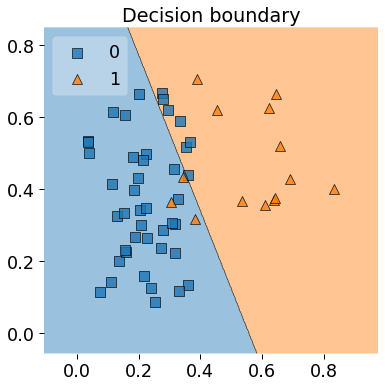

In [73]:
# Decide features to use in the dataset
model = LogisticRegression()
#model = SVC()
#model = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, min_samples_leaf = 1)

validation_set_size_fraction = 0.1
features_to_use = ["radius_mean", "texture_mean"]

# Load dataset
dataset = df_proc_scaled[features_to_use]
targets = df_proc_scaled["diagnosis"]

# Define training and validation dataset
train_x, train_y, valid_x, valid_y = generate_train_valid_sets(dataset, targets,
                                                               validation_set_size_fraction = validation_set_size_fraction)
# Train model
model.fit(train_x, train_y)

# Calculate performance and show decision boundary decision between the first two features
test_performance(model, valid_x, valid_y)
plot_boundary(model, valid_x, valid_y, figsize = (6,6))

To help you explore the impact of different parameters and input features on the model performance, we have formalized a few questions. Please go through these, and use them when playing with model fitting. 

#### Questions:

1. What does the decision boundary look like if you are training only with a single feature?
2. What are the top 2 most predictive features in isolation (only 1 training feature), as judged by accuracy??
3. Which combination of 2 features gives the best predictive model, as judged by accuracy? You may want to look at previous sections of the notebook
4. What happens if you include "diagnosis" as a feature in the prediction model (in isolation or in combination with other features)?
5. How would you describe the different decision boundaries of **LogisticRegression**, **SupportVectorMachine** and **RandomForestClassifier** models respectively (use two features at a time)?
6. What is the effect of changing the validation set fraction parameter? How does this impact your training model?
6. With the best model that you have so far, what is the difference in performance between the normalized dataset (**df_proc_scaled**) vs the un-normalized dataset (**df_proc**)?

#### Answers:

## Machine-learning competition

Now that you have played arround with 3 different machine learning algorithms for classification, **we believe you are ready for a challenge!**

We therefore invite all workshop participants to take part in the **big machine learning competition**. 

The aim of the machine learning competition is for you to independently implement a machine learning model, that is able to accurately classify tumor samples from the very same dataset that we have been working with all morning. 
The winner is the participant that reaches the highest accuracy (as it was defined above). 

The competition rules are as follow: 

1. You are only allowed to submit 3 models to the competition. 
2. You are only allowed to use the specific classification algorithms taught in this workshop.
3. You are only allowed to train on the provided dataset. 
4. Use the already scaled data (df_proc_scaled) to train your model on to ensure compatability with the test set.

We would also very much appreciate if you would post a picture of your model accuracy on __social media (Facebook or Twitter) #Biodatascience101__ and tag us in it. Links for our social media pages can be found in the bottom.


To ensure fairness, we have implement a class to handle all model submissions. It is already instantiated as "submit_competition_model" in the notebook.



In [74]:
# If module is loaded
#Should print something like: 
#<competition_model.competition_model_class at 0x7fbf394af940>

submit_competition_model


It itself holds the test set, so you don't have to worry about that. 

The module contains two core functionalities:

**submit_competition_model.Submit()**: is a method to submit a trained model for the competition. You need to pass it the following things to successfully make the submission: model (sklearn model) and features (list of features used for training e.g. ["perimeter_worst", "radius_worst"])

**submit_competition_model.get_best_model()**: allows you to see the performance of your best model. This method resets every time you restart the notebook. 

Example of how to use submission module: 
    
__Note__: Examples should not be run!

### Good luck all!

#### Implement your model here: 

## We would love to hear about your experience with the notebook. If you would like to give us 2 minutes extra of your time, we have prepared a feedback form here. Thanks a lot!

## Biodatscience101 2nd event feedback form: https://forms.gle/j8LHtRe1cDgS8YKy9

__Want to stay updated on our next #Biodatscience101 events? We will be posting these on our social media:__

Facebook: https://www.facebook.com/biodatascience101

Twitter: https://twitter.com/Biodatascience1

Linkedin: https://www.linkedin.com/company/biodatascience101/